In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [14]:
df = pd.read_csv('car data.csv')

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df.shape

(301, 9)

In [17]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
#finding unique values of object columns
cat = df.select_dtypes(include=['O'])
cat.apply(pd.Series.unique)

Car_Name        [ritz, sx4, ciaz, wagon r, swift, vitara brezz...
Fuel_Type                                   [Petrol, Diesel, CNG]
Seller_Type                                  [Dealer, Individual]
Transmission                                  [Manual, Automatic]
dtype: object

In [19]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [22]:
from datetime import datetime
currentYear = datetime.now().year

In [24]:
final_dataset['Current_Year'] = currentYear

In [26]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [27]:
final_dataset['no_year'] = final_dataset['Current_Year']-final_dataset['Year']

In [28]:
final_dataset.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9


In [29]:
final_dataset.drop(['Year','Current_Year'],axis=1, inplace=True)

In [30]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9


In [31]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [32]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1


In [33]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


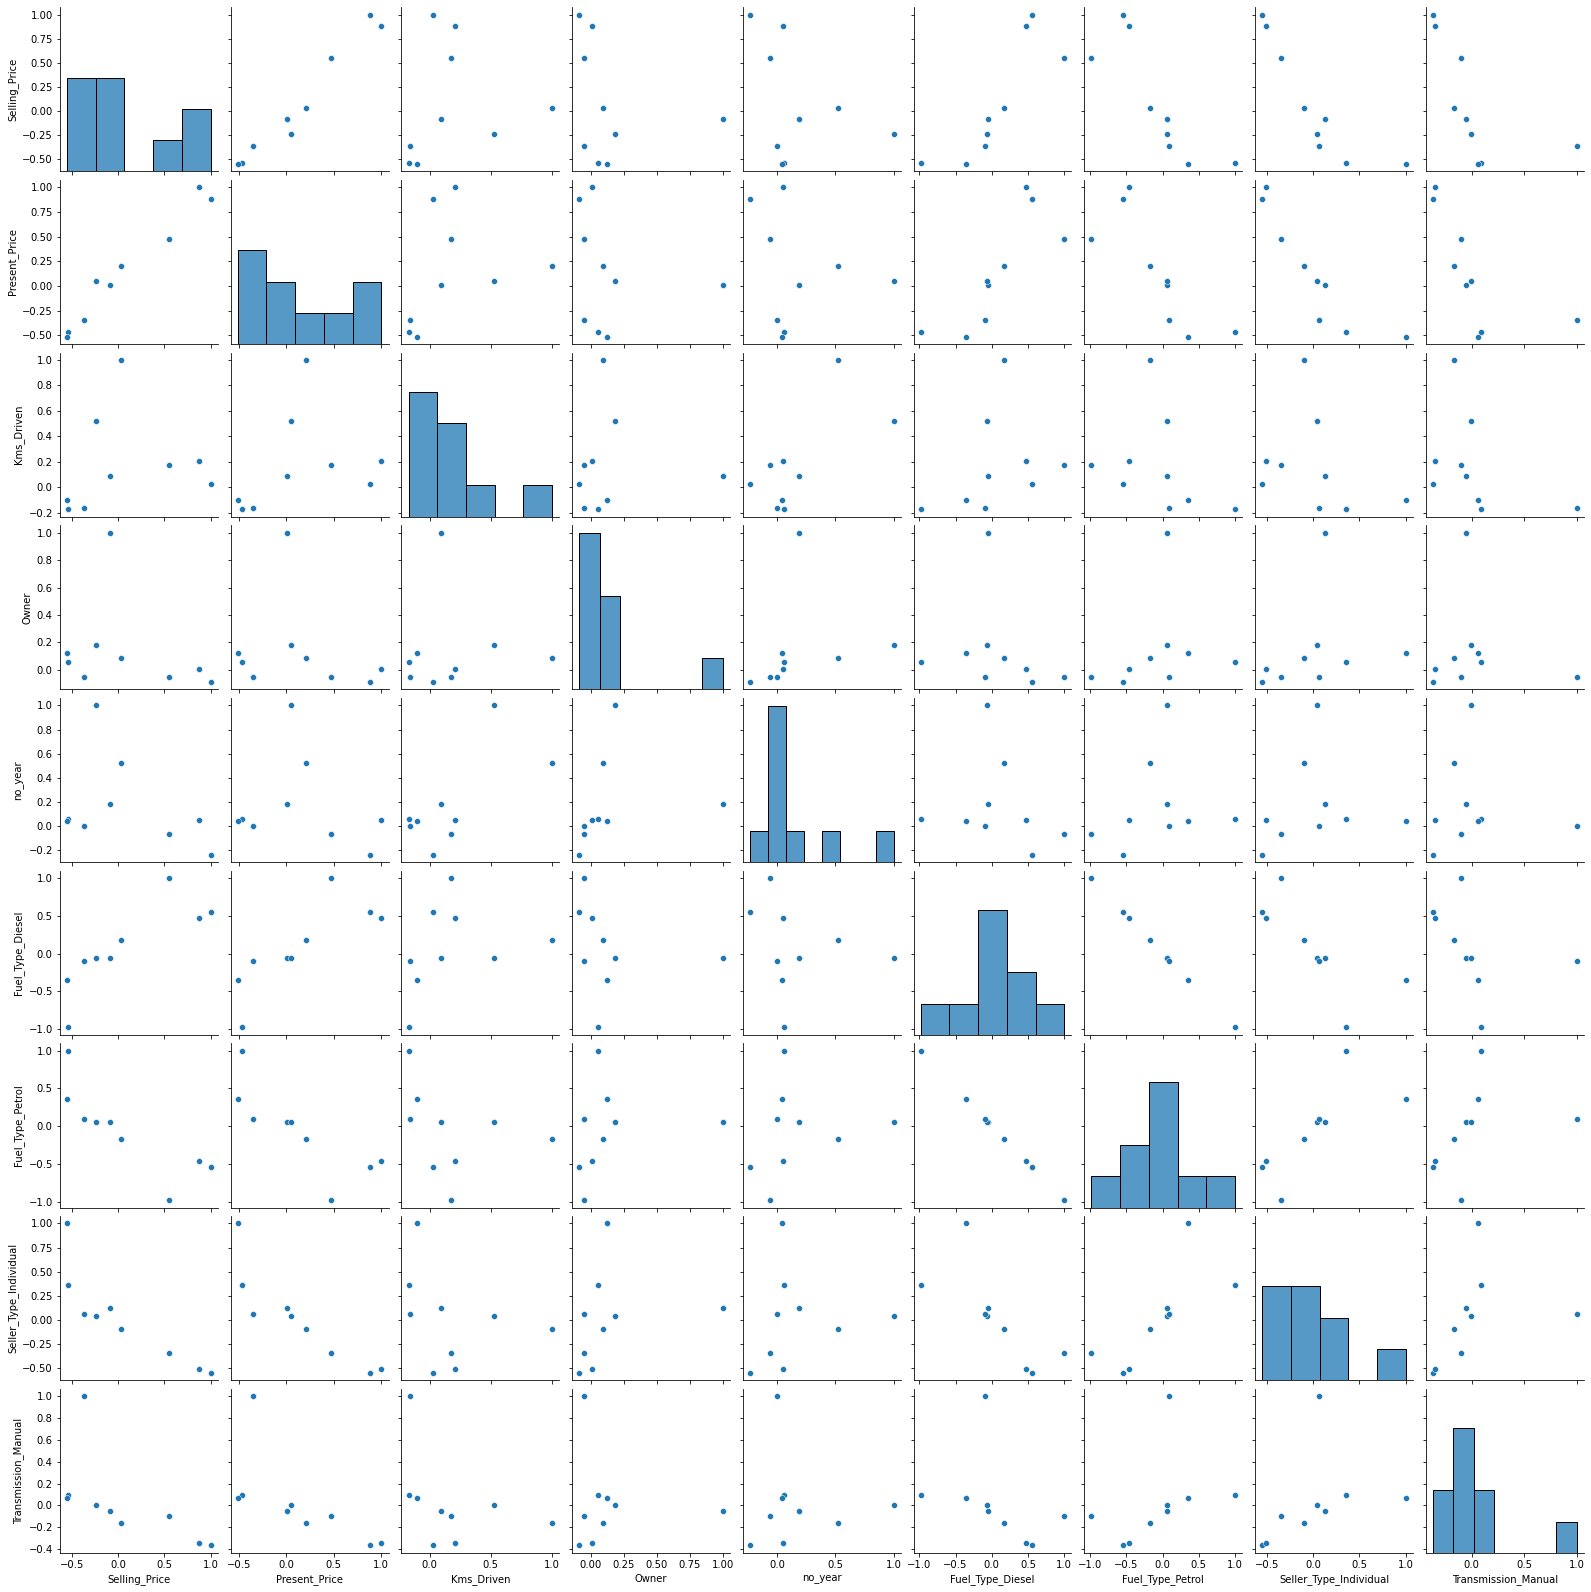

In [35]:
sns.pairplot(final_dataset.corr())

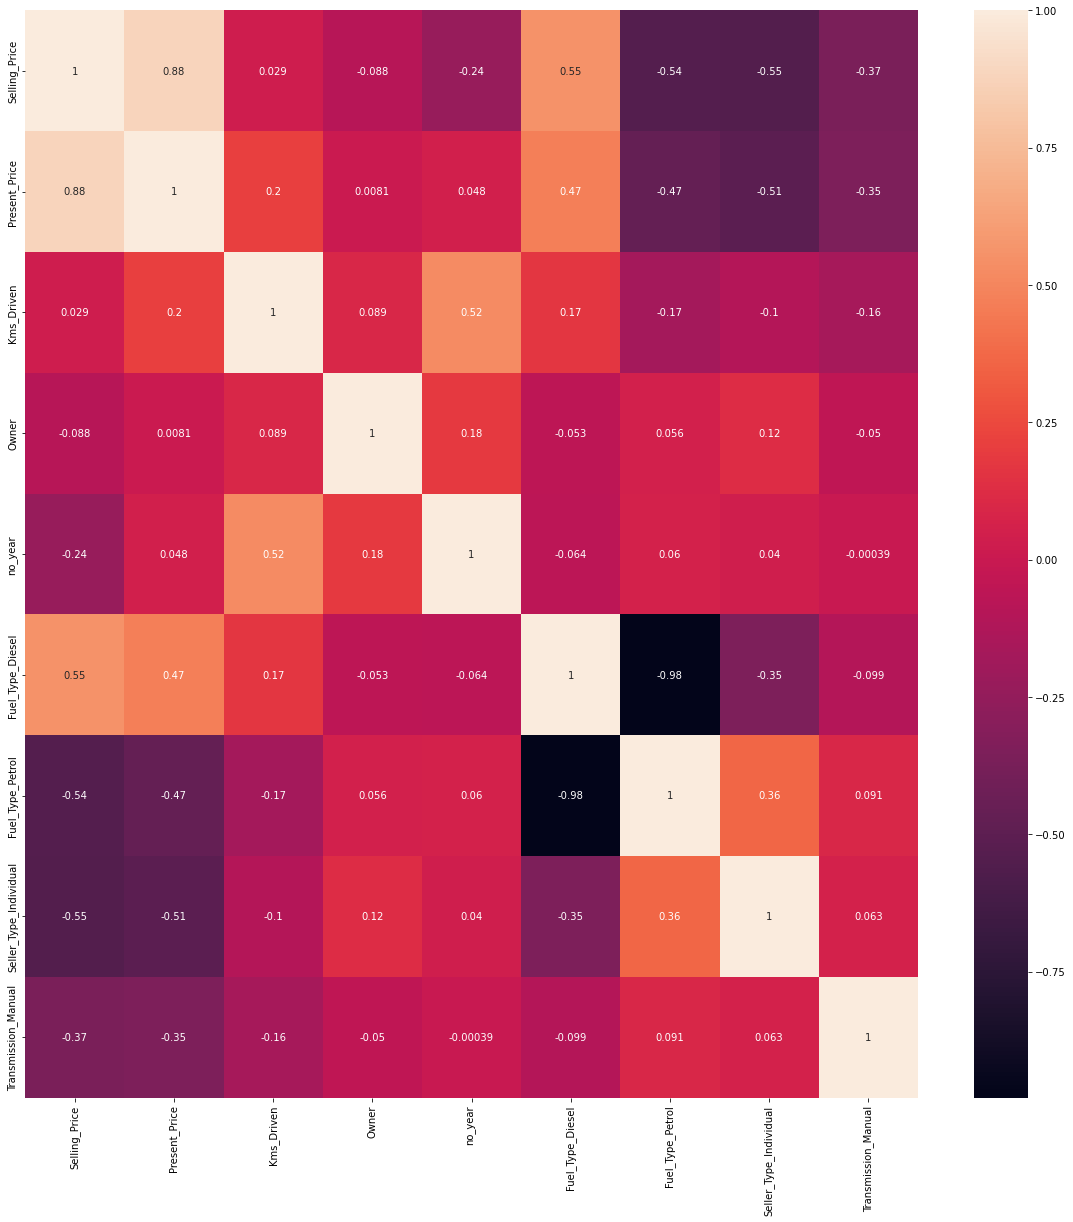

In [39]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g= sns.heatmap(final_dataset[top_corr_features].corr(),annot=True)

In [40]:
#Independent and Dependent features
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [41]:
X.head(2)

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1


In [42]:
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [44]:
#Feature Importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [45]:
print(model.feature_importances_)

[0.36201786 0.04007592 0.00044144 0.0774801  0.2402869  0.01256698
 0.1231051  0.14402569]


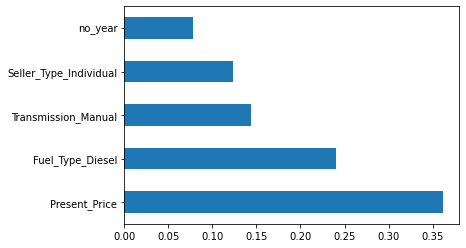

In [47]:
#plot graph of feature importance
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [49]:
#Split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [53]:
#Model

rf_random = RandomForestRegressor()

In [62]:
#Hyperparameters

#number of tress in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30,6)]
#Number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Number of samples required to split at each leaf node
min_samples_leaf = [1,2,5,10]

In [63]:
#Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [64]:
rf = RandomForestRegressor()

In [65]:
#Random grid to search best hyperparameters

rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5,verbose = 2,random_state=42,n_jobs=1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
predictions = rf_random.predict(X_test)

In [68]:
predictions

array([ 0.6032 ,  0.59289,  6.18645,  3.06962,  4.69653,  9.57991,
        5.90495,  7.84768,  0.263  ,  0.90787,  5.6433 ,  2.05367,
        7.99828,  2.65382,  3.301  ,  4.95639,  3.4117 ,  0.95023,
        7.30357,  8.04294,  0.76811,  0.693  ,  6.39913,  5.29212,
        5.68473,  4.5321 ,  8.53362,  4.52595,  0.52357,  7.48202,
        0.49333,  2.63711,  0.64503,  0.67701,  0.59575,  5.31276,
        9.16778,  9.59192,  8.8147 ,  4.55855,  5.28175,  0.55226,
       21.01516,  4.07664,  6.85631,  2.27614,  0.37029,  4.47545,
       15.77657,  4.61837,  3.74069,  0.66629,  5.62776,  0.52738,
        9.70169,  1.2867 ,  4.97568,  0.39128,  8.27828,  1.37071,
        0.88909])

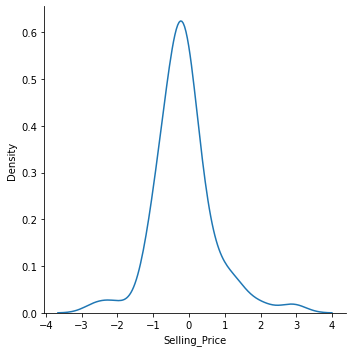

In [78]:
sns.displot(y_test-predictions,kind = 'kde')

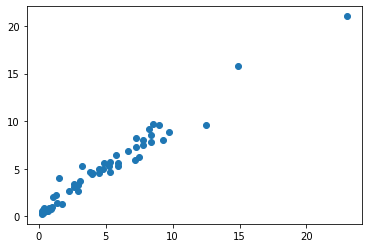

In [79]:
plt.scatter(y_test,predictions)

In [81]:
#saving as pickle file

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)